In [1]:
import pynurex as nurex
import matplotlib.pyplot as plt
import numpy as np

## Densities

In [2]:
df = nurex.make_density({"type":"fermi","parameters":[5,0.7,0.1]})
df2 = nurex.DensityFermi(r=5,z=0.7,w=0.1)

In [3]:
r = np.arange(0,8,0.1)  # radius from 0 to 8
rho = [df.density(_r) for _r in r]  # densities to r

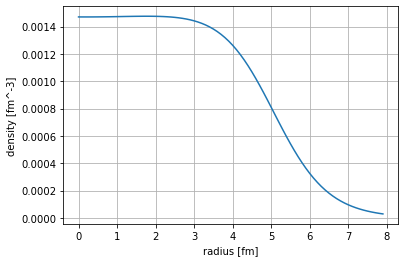

In [4]:
plt.figure()
plt.plot(r,rho)
plt.grid()
plt.xlabel("radius [fm]")
plt.ylabel("density [fm^-3]")
plt.show()

In [5]:
nurex.r_rms(df)

4.747324006071048

In [6]:
df.r_rms()

4.747324006071048

In [7]:
df2.r_rms()

4.747324006071048

In [8]:
df = nurex.DensityHO(r=5,a=1.2)
df2 = nurex.make_density({"type":"ho","parameters":[5,1.2]})

In [9]:
df.r_rms()

7.319250547113999

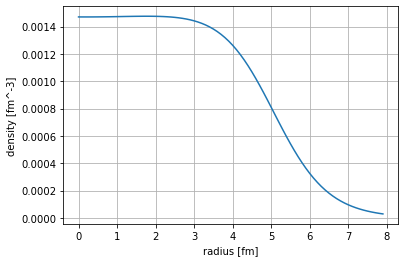

In [10]:
plt.figure()
plt.plot(r,rho)
plt.grid()
plt.xlabel("radius [fm]")
plt.ylabel("density [fm^-3]")
plt.show()

## Default Nuclei

In [11]:
nurex.density_object(df)

{'type': 'fermi', 'parameters': [5.0, 0.7, 0.1]}

In [9]:
nuc = nurex.Nucleus(16,6,df,df)

In [11]:
nuc = nurex.default_nucleus("12c")

In [12]:
nuc.get_density_neutron().r_rms()

2.291230871159302

In [13]:
nuc.get_density_proton().r_rms()

2.3212381828247484

In [14]:
nurex.density_type_to_string(nuc.get_density_proton())

'ho'

In [15]:
nurex.nucleus_object(nuc)

{'nucleus': [12, 6],
 'proton_density': {'type': 'ho', 'parameters': [1.56449, 1.56578]},
 'neutron_density': {'type': 'ho', 'parameters': [1.53933, 1.67673]}}

## Model Configuration

In [17]:
model_config = {"model":"OLAZR_FM",
                  "projectile":"12c",
                  "target":{
                  "nucleus":"12c",
                  "proton_density":{"type":"ho", "parameters":[1.548415436,1.6038565]},
                  "neutron_density":{"type":"ho", "parameters":[1.548415436,1.6038565]}
                  },
                "charge_changing_correction":"evaporation",
                "level_density":"GC_GEM"
                  }

In [18]:
    gm = nurex.make_model(model_config)

In [21]:
energies = np.arange(100,900,20)
cccs = nurex.sigma_cc(gm, energies)
cccs

array([945.55113832, 887.88656753, 846.6922378 , 817.24413901,
       796.06586719, 780.76703488, 769.38002886, 760.99824256,
       754.87901663, 750.46531005, 747.30463539, 745.35725996,
       744.39753972, 744.29659697, 744.87587708, 746.10449766,
       747.92379723, 750.24975923, 753.06939408, 756.38375571,
       760.13511896, 763.96345995, 767.75486899, 771.76528202,
       776.31508801, 780.88417231, 784.90531257, 788.16924923,
       791.42544916, 794.9239463 , 798.20542948, 800.84209831,
       802.7249781 , 804.36151259, 805.94511906, 807.36213507,
       808.48868951, 809.30399257, 809.92949092, 810.45889016])

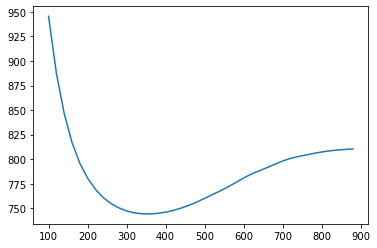

In [22]:
plt.figure()
plt.plot(energies, cccs)
plt.show()

In [20]:
gm.sigma_cc(350)

744.2475022396527

In [23]:
gm.sigma_ins(200)

[102.27121590459653,
 25.518829160487275,
 7.440415024460265,
 2.0717935970959087,
 0.45530499849126693,
 0.05999633225026835]

In [24]:
gm.n_removals_evaporation()

{'Ptot': [0.7218876001327407,
  0.985879327848388,
  0.9999111205873109,
  1.0,
  -1.0,
  -1.0],
 'Pch': [0.7101813593596465,
  0.9838586365353038,
  0.9994789632302895,
  0.9999999469603684,
  -1.0,
  -1.0]}